**<h1><center><center><center>BÀI TẬP COLAB SỐ 02 </center></h1>**
**<h1><center><center><center>RECOGNIZING HAND-WRITTEN DIGITS</center></h1>**
###LỚP: CS114.M11.KHCL
###NHÓM: DSE
1. Lê Đình Đức - *19521372*
2. Phan Anh Lộc - *19521766*
3. Lưu Anh Dũng - *19521392*

###Nguồn tham khảo:

1. Recognizing hand-written digits - [LINK](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

This example shows how scikit-learn can be used to recognize images of hand-written digits, from 0-9.

In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


#Digits dataset

Tập dữ liệu chữ số bao gồm hình ảnh của các chữ số có độ phân giải là 8x8 pixel. Thuộc tính hình ảnh của tập dữ liệu là một mảng có kích thước 8x8 thể hiện thang độ xám của mỗi hình. Chúng ta sẽ sử dụng các mảng này để hình dung 4 hình ảnh đầu tiên. Thuộc tính target của tập dữ liệu lưu trữ chữ số mà mỗi hình ảnh đại diện và điều này được bao gồm trong tiêu đề của 4 ô bên dưới.

Lưu ý: nếu ta làm việc với tệp hình ảnh (ví dụ: tệp ‘png '), sử dụng matplotlib.pyplot.imread để tải hình ảnh.

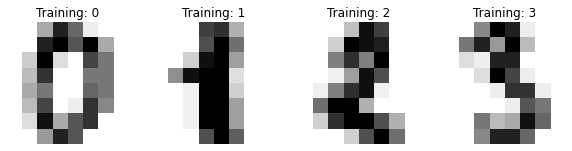

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# Classification
Để tiến hành phân loại trên bộ dữ liệu này, ta cần "làm phẳng" các hình ảnh, chuyển từng mảng 2 chiều các giá trị thang độ xám từ kích thước là (8, 8) sang kích thước (64,). Sau đó, toàn bộ tập dữ liệu sẽ có dạng là (n_samples, n_features).
+ n_samples là số lượng hình ảnh
+ n_features là tổng số pixels của mỗi hình ảnh

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Để dễ hình dung hơn ta hiển thị giá trị chữ số và dự đoán chúng trên tiêu đề đối với 4 chữ số đầu tiên của tập dữ liệu test

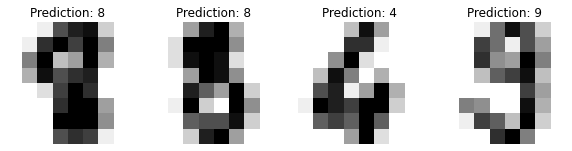

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Module metrics.classification_report đánh giá tập train qua các chỉ số phân loại chính (precison, recall, f1-score, support)

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Trực quan nó với Confusion Matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


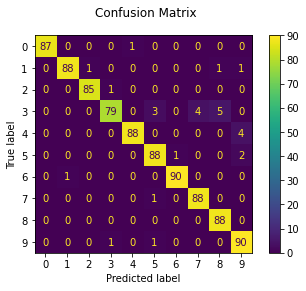

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Capture Camera

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
#Capture camera
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


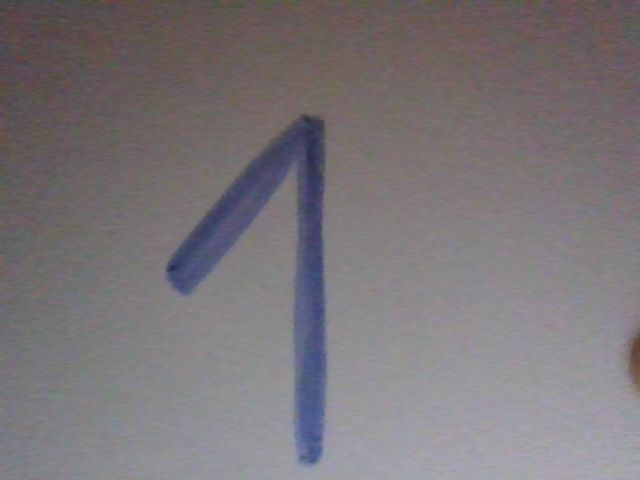

In [ ]:
#Nguồn: https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Xử lí ảnh về trắng đen

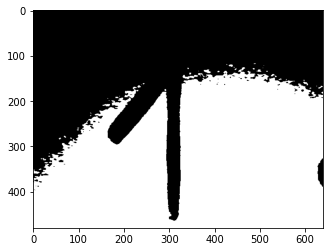

In [ ]:
#Link tham khảo: https://www.it-swarm-vi.com/vi/python/chuyen-doi-hinh-anh-opencv-sang-den-trang/939703473/
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread("photo.jpg")
# Đọc ảnh thang độ xám
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image_blur = cv2.GaussianBlur(image_gray,(5,5),0)
#Chuyển đổi hình ảnh thang độ xám thành nhị phân
im,thre = cv2.threshold(image_blur,115,255,cv2.THRESH_BINARY_INV)
#Show ảnh đã xử lý
plt.imshow(thre, cmap = 'gray')
ret,thresh2 = cv2.threshold(thre,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')

# Resize images

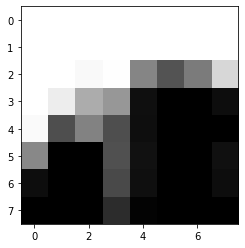

In [ ]:
a = cv2.resize(thre,(8,8),interpolation = cv2.INTER_AREA)
a = a/16
plt.imshow(a, cmap = 'gray')
a = a.reshape(1, 64)

# Predict

In [ ]:
predict = clf.predict(a)
print("Result predict:",predict)

Result predict: [1]


# Load ảnh từ drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

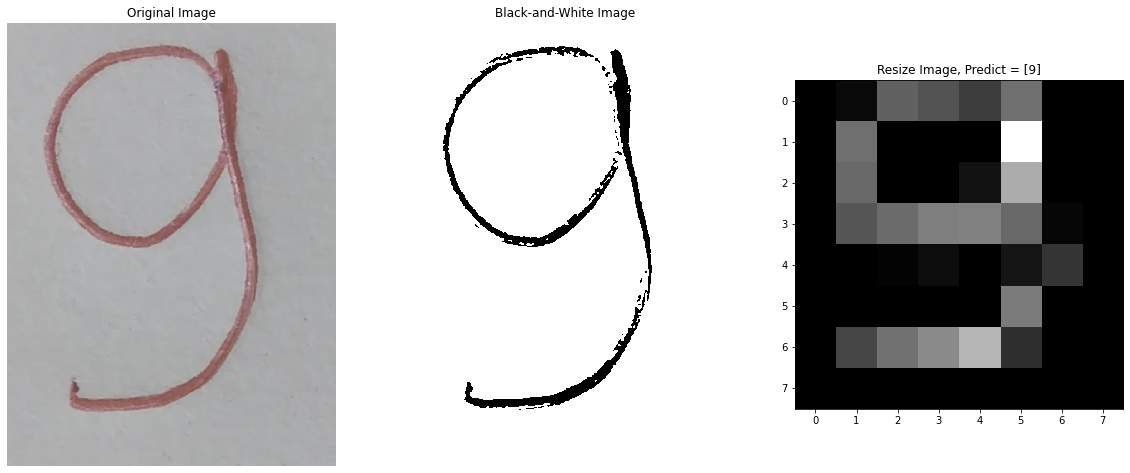

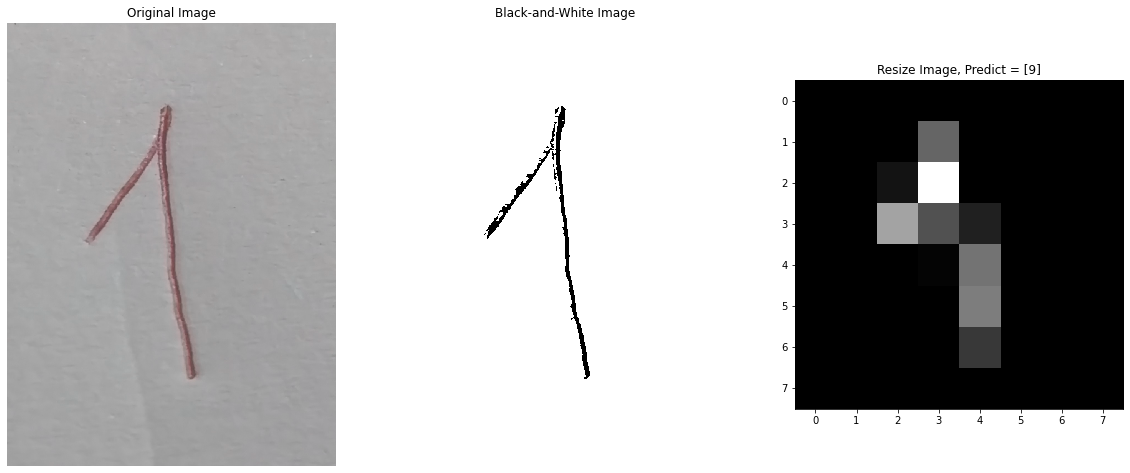

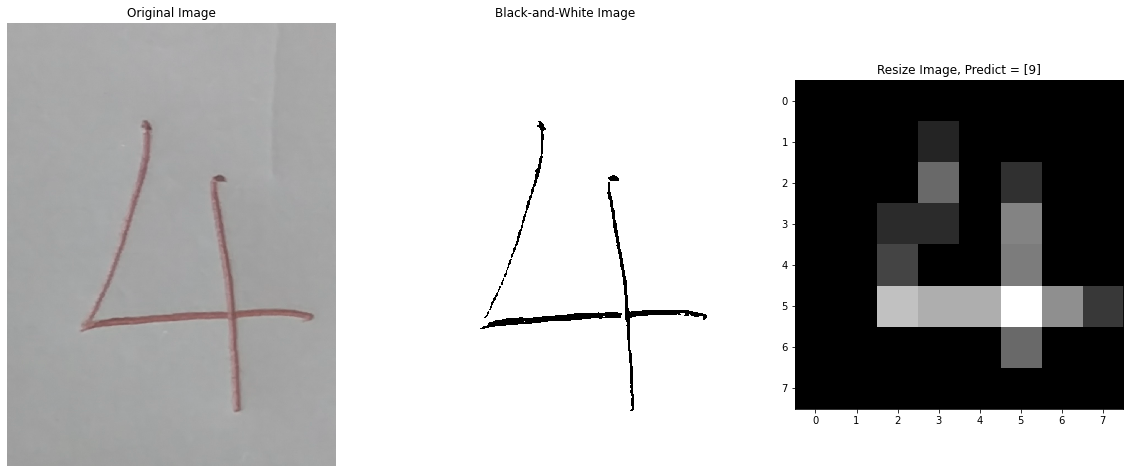

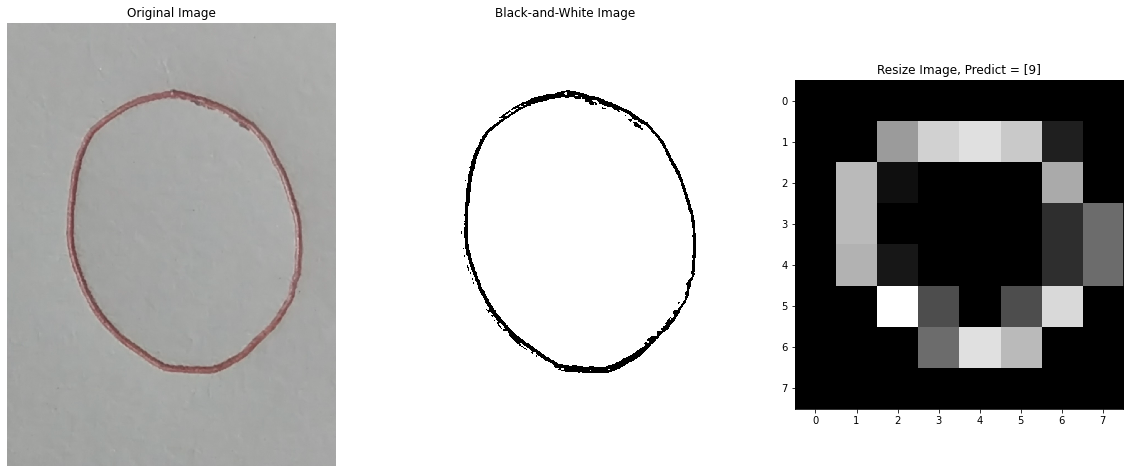

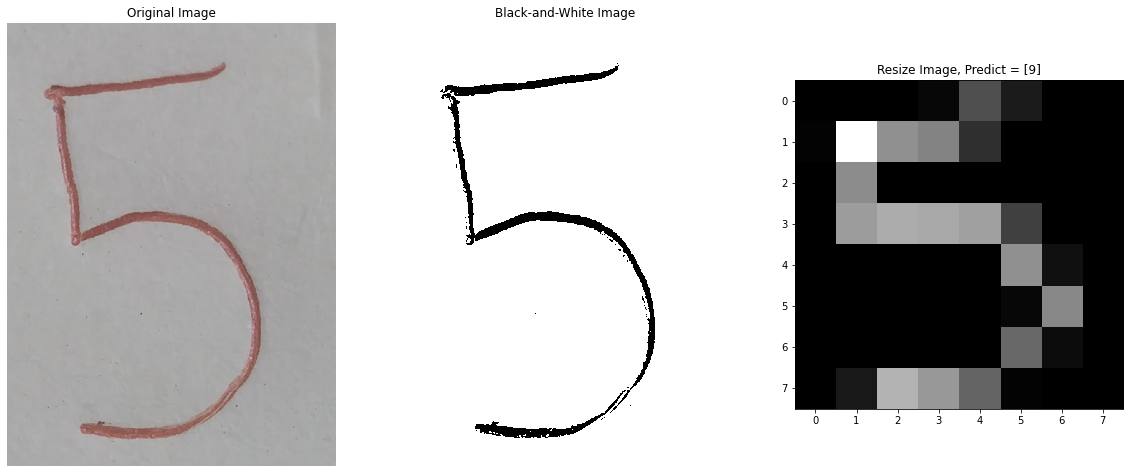

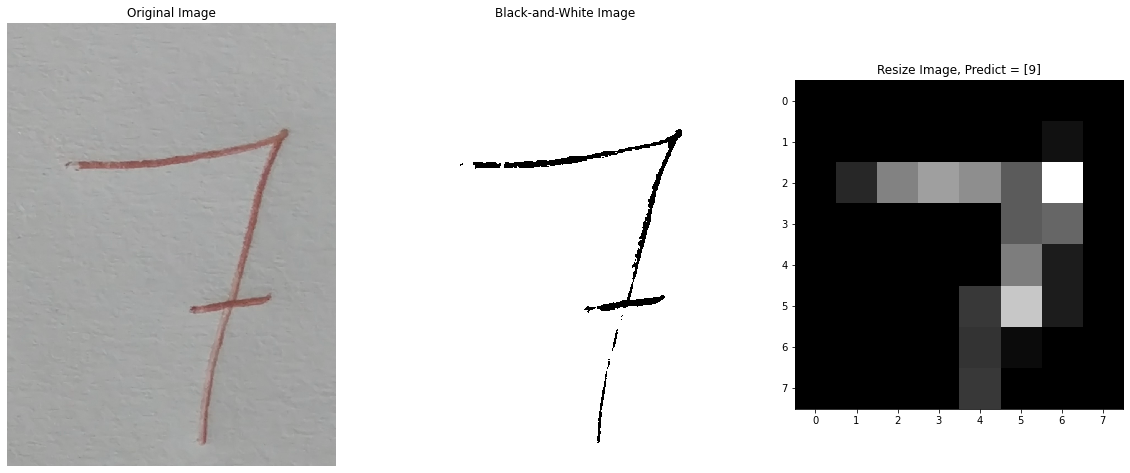

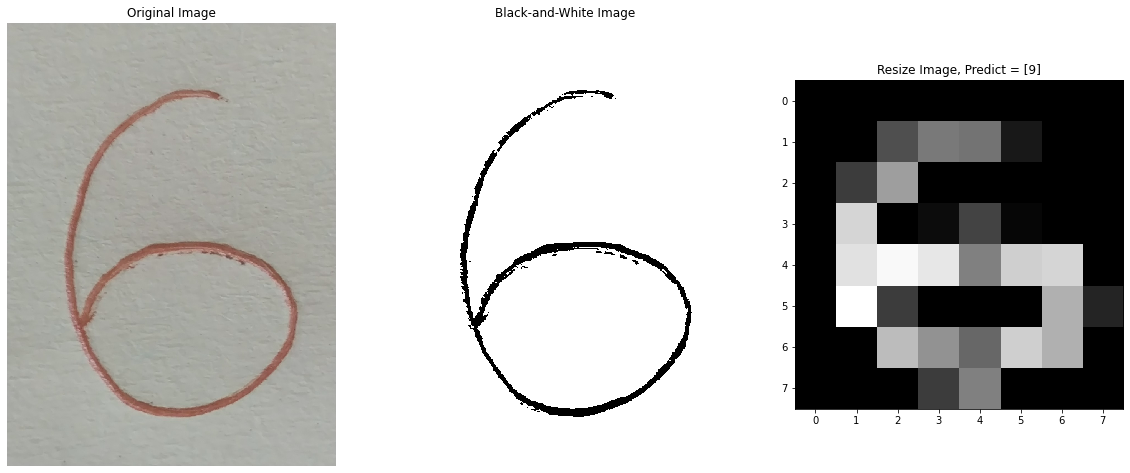

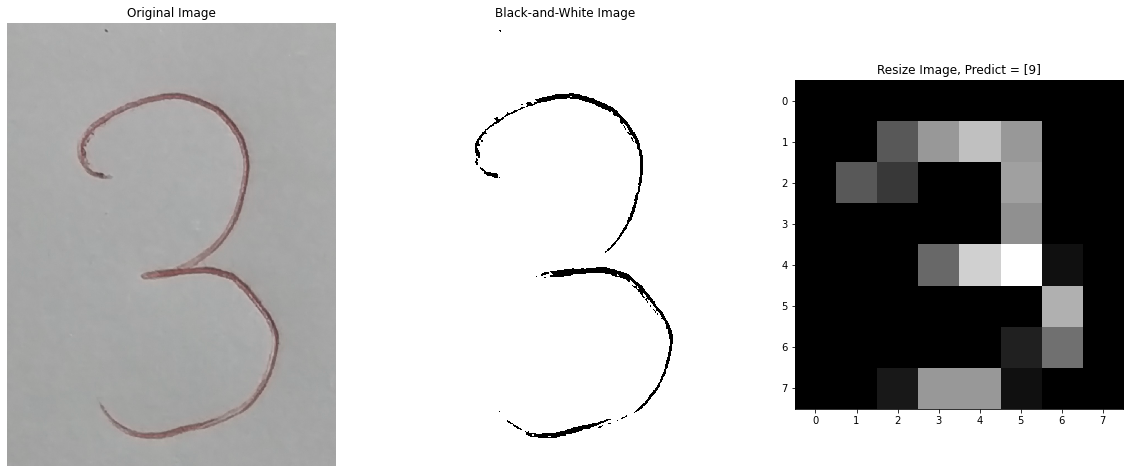

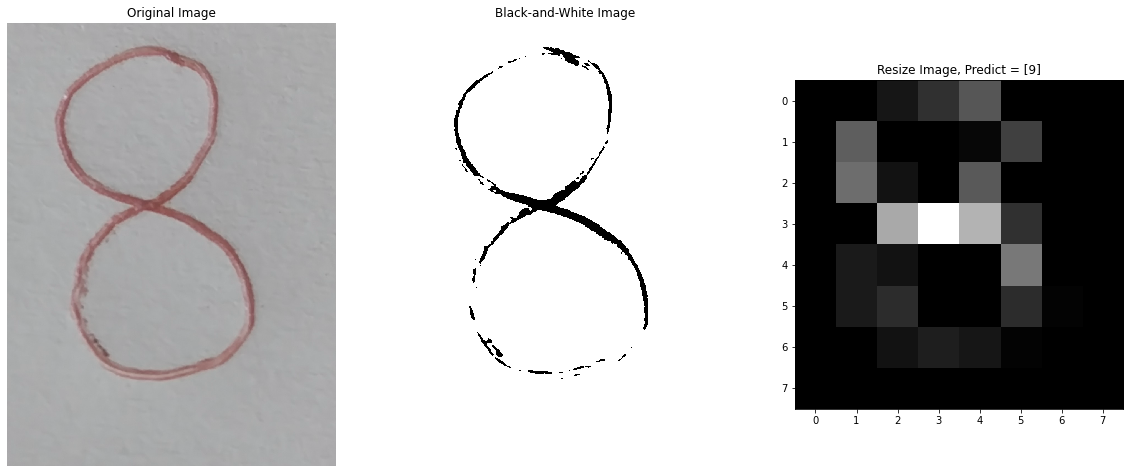

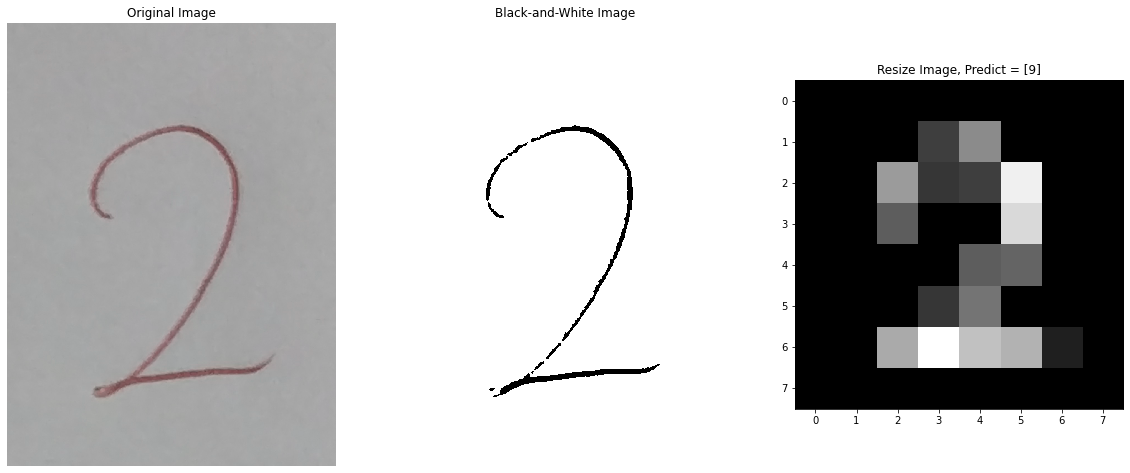

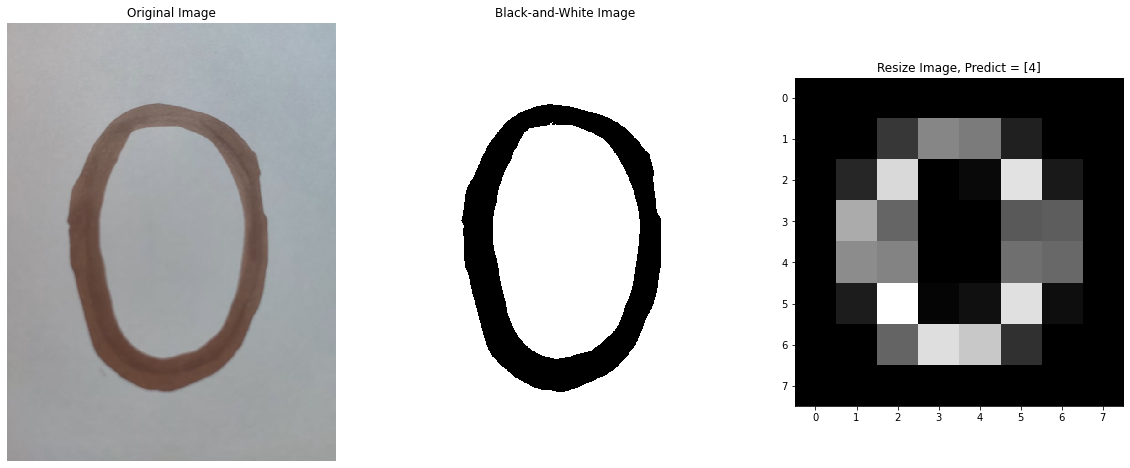

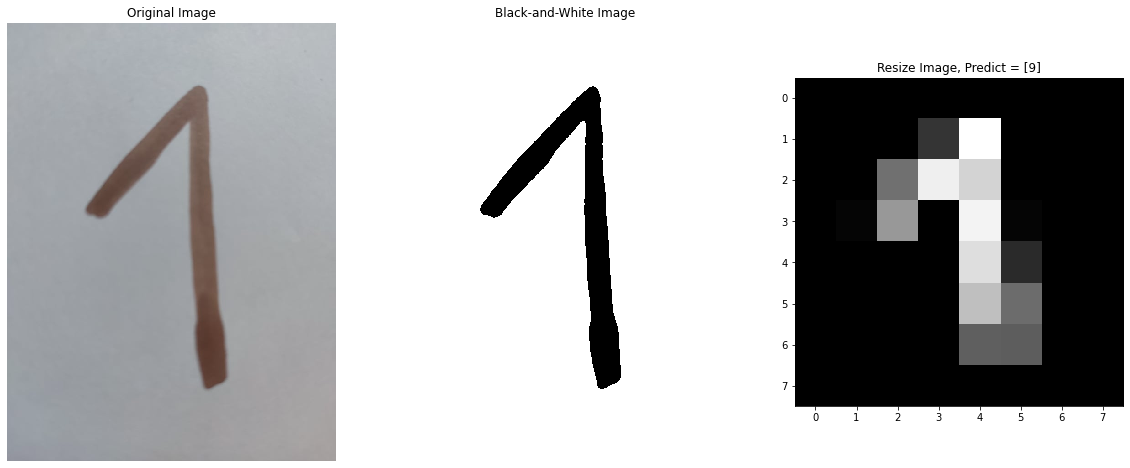

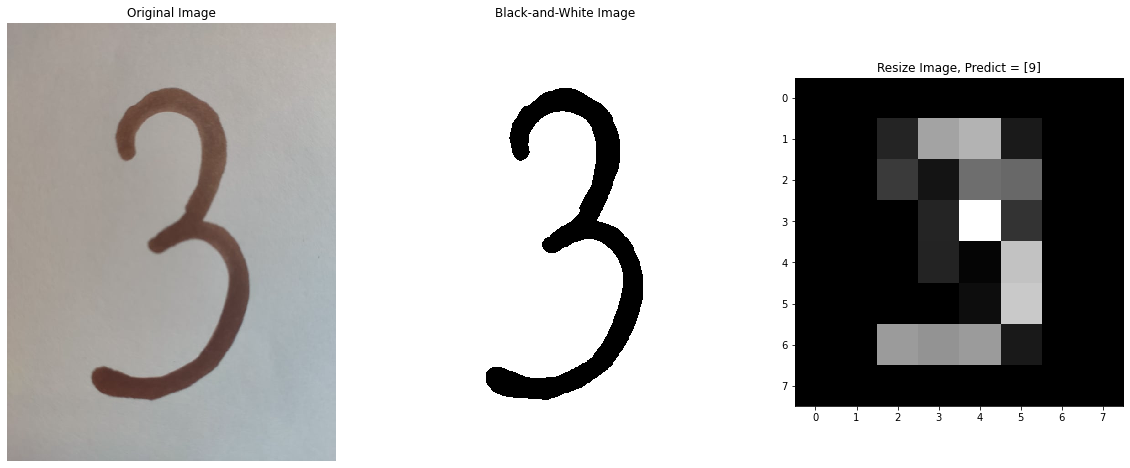

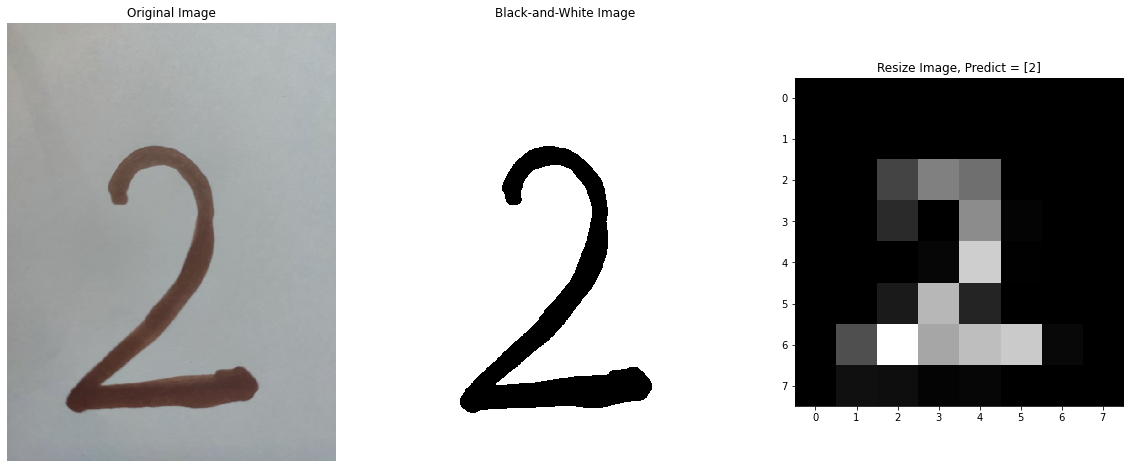

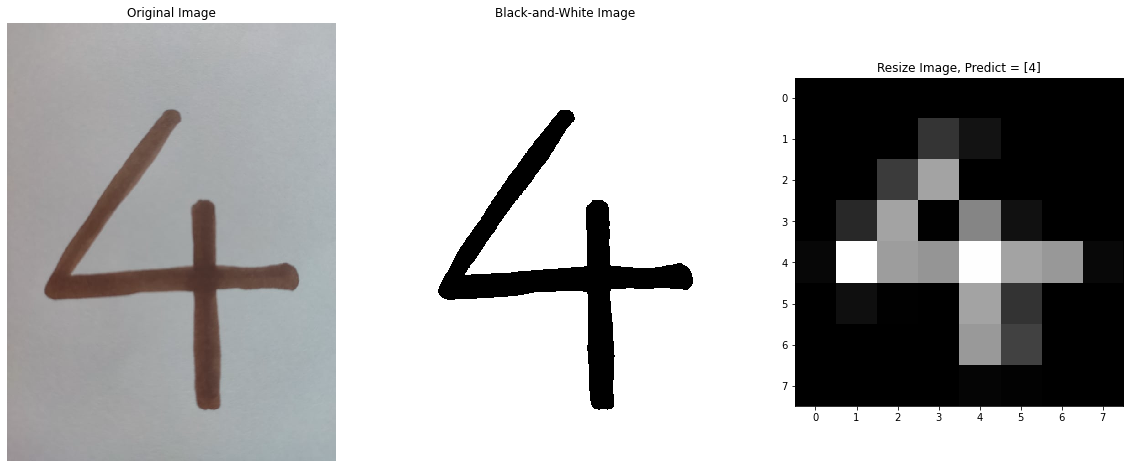

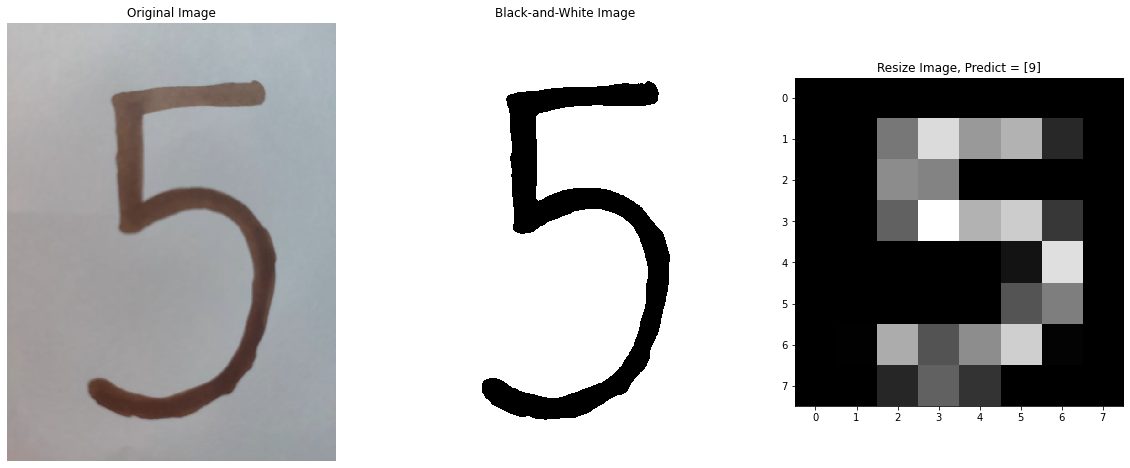

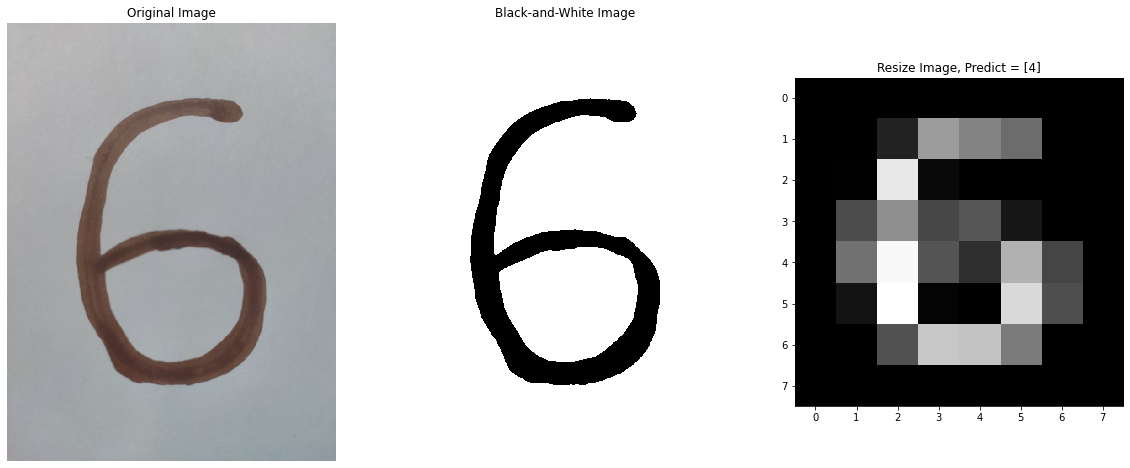

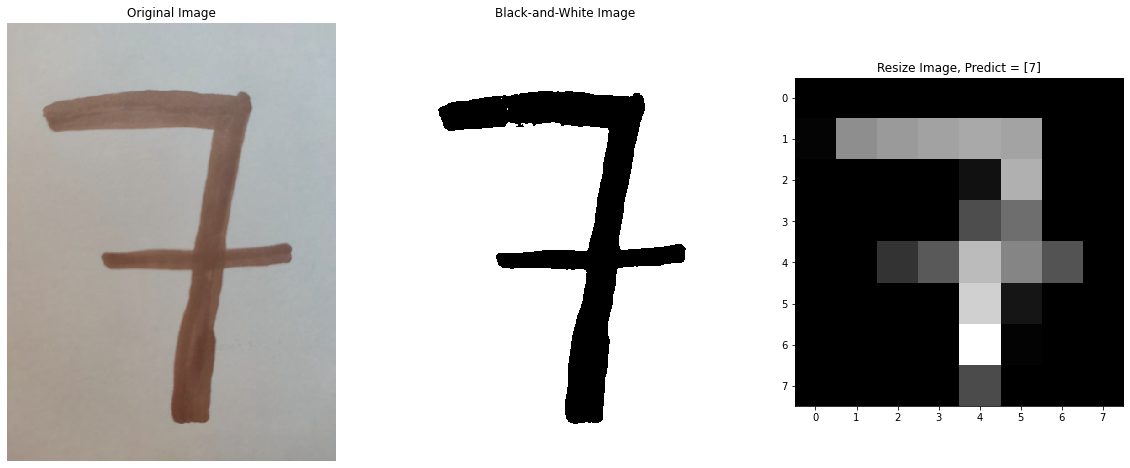

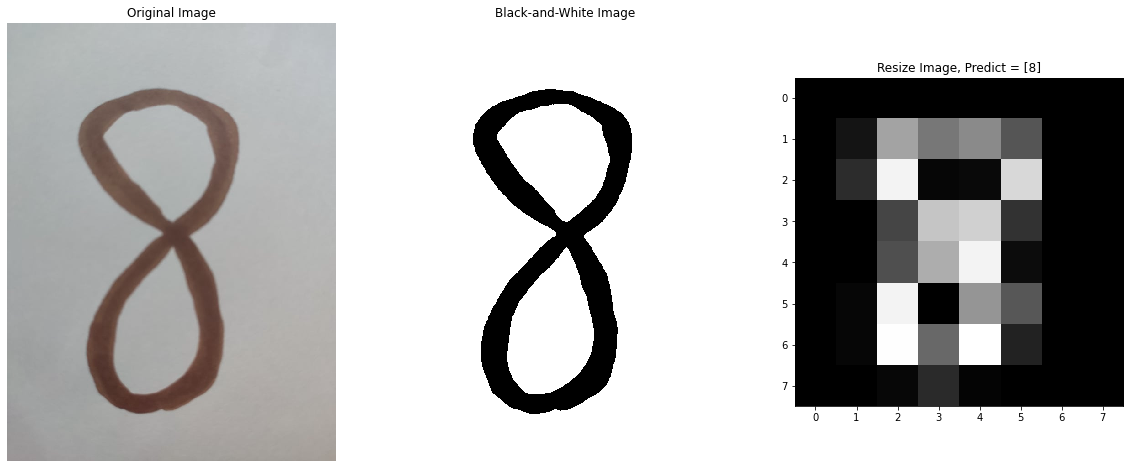

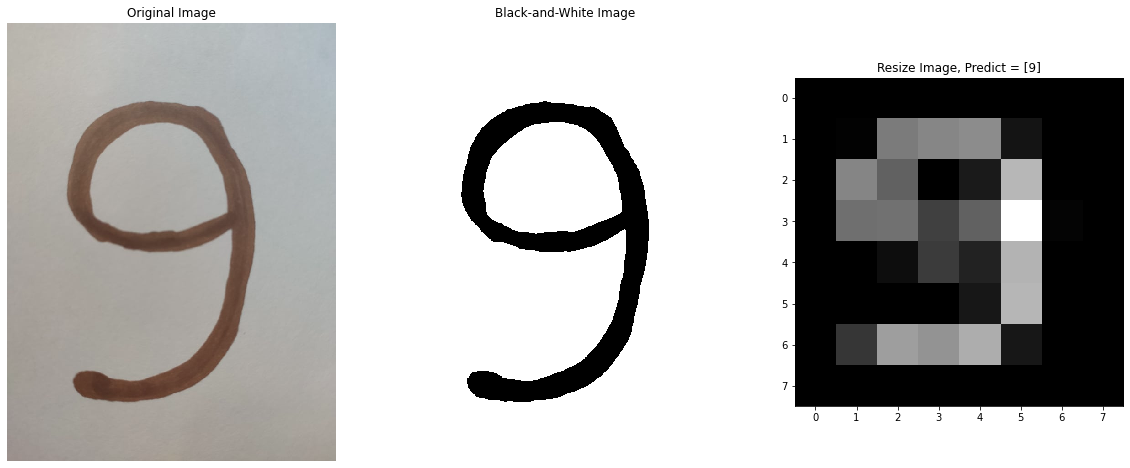

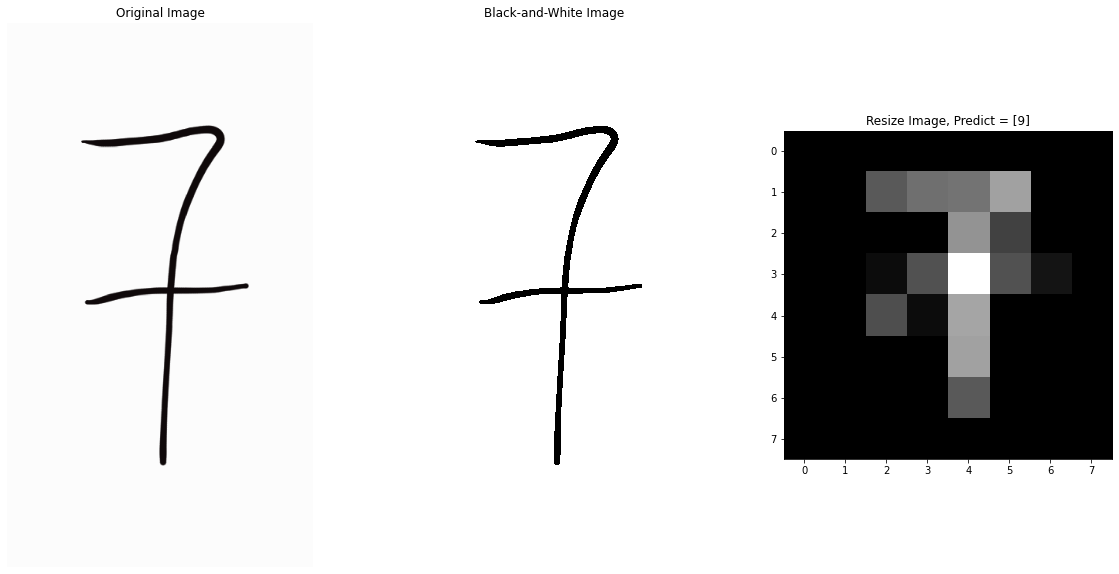

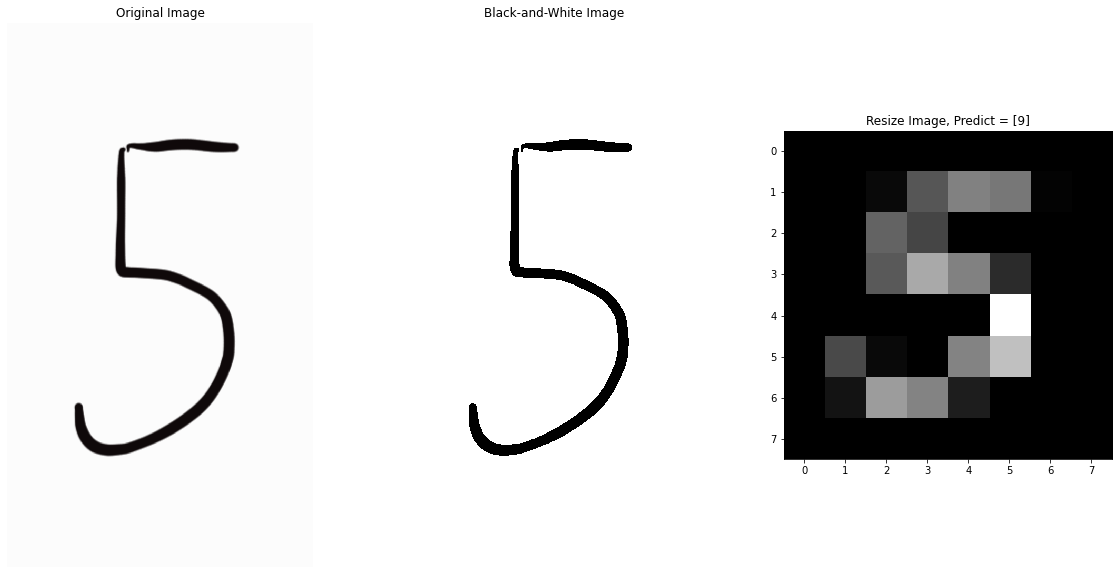

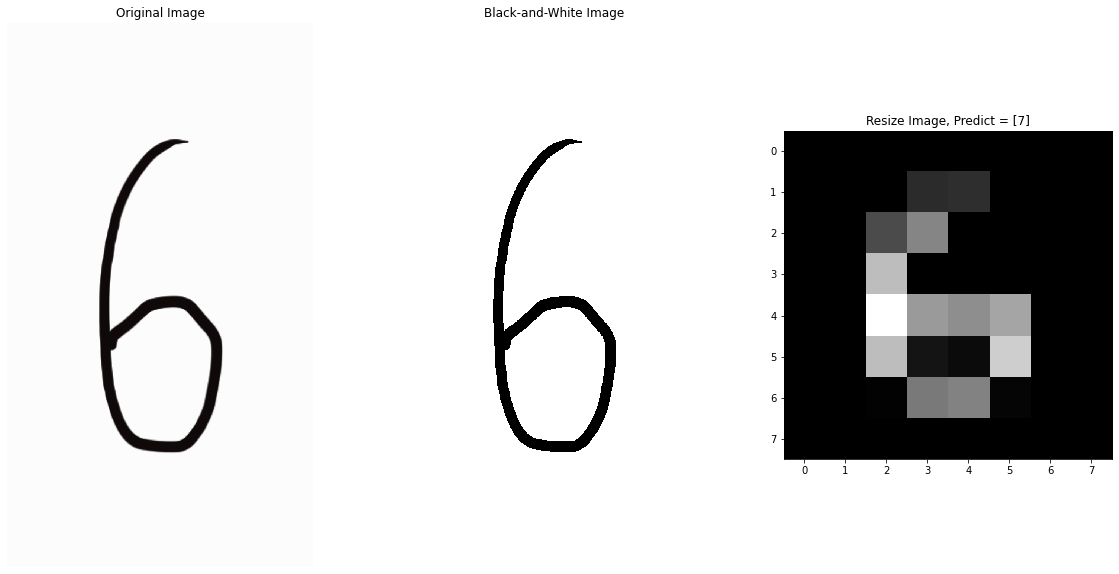

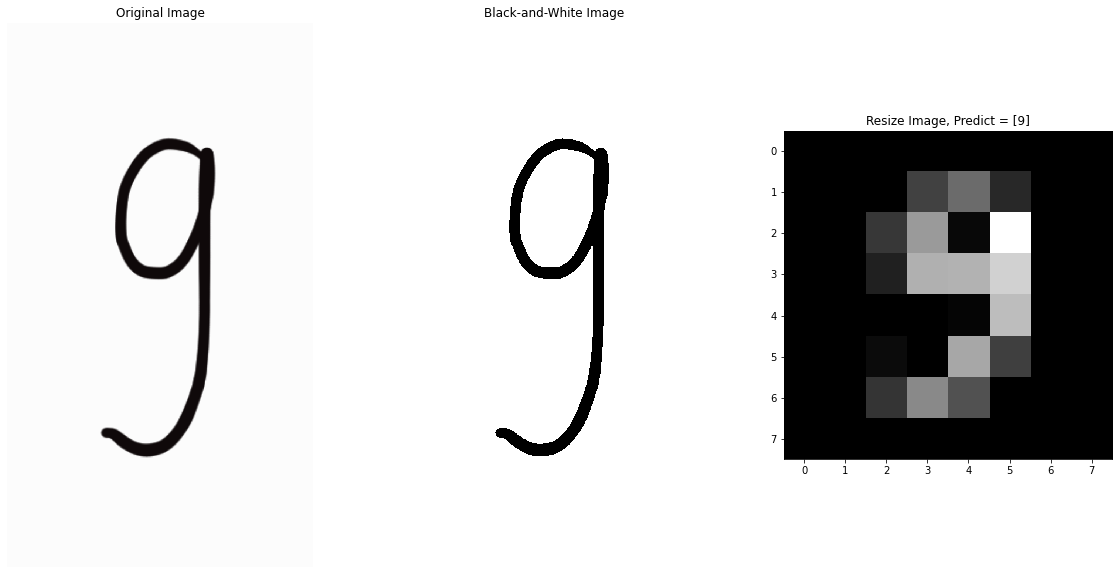

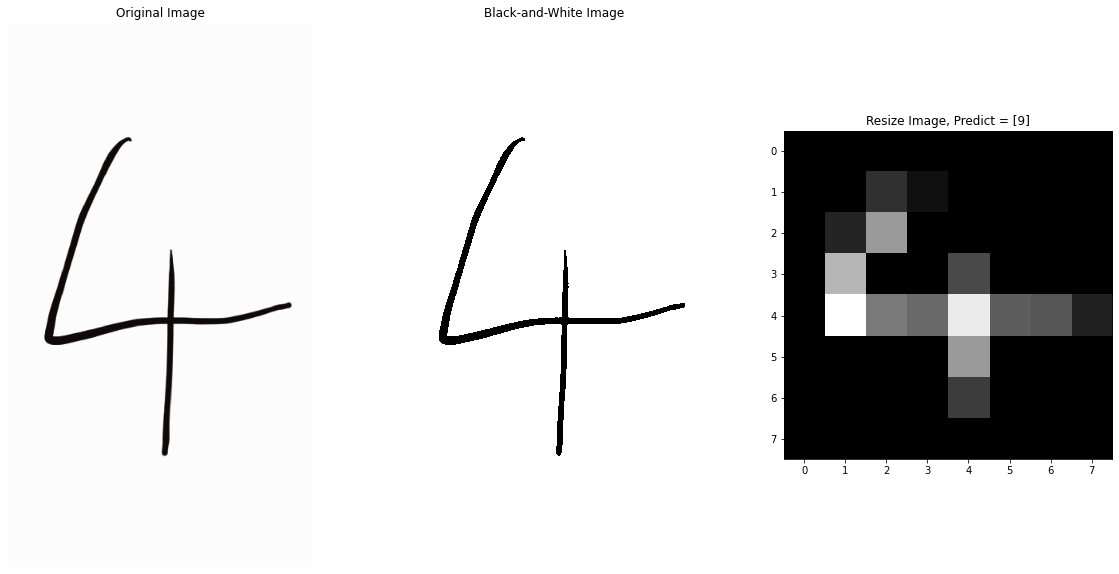

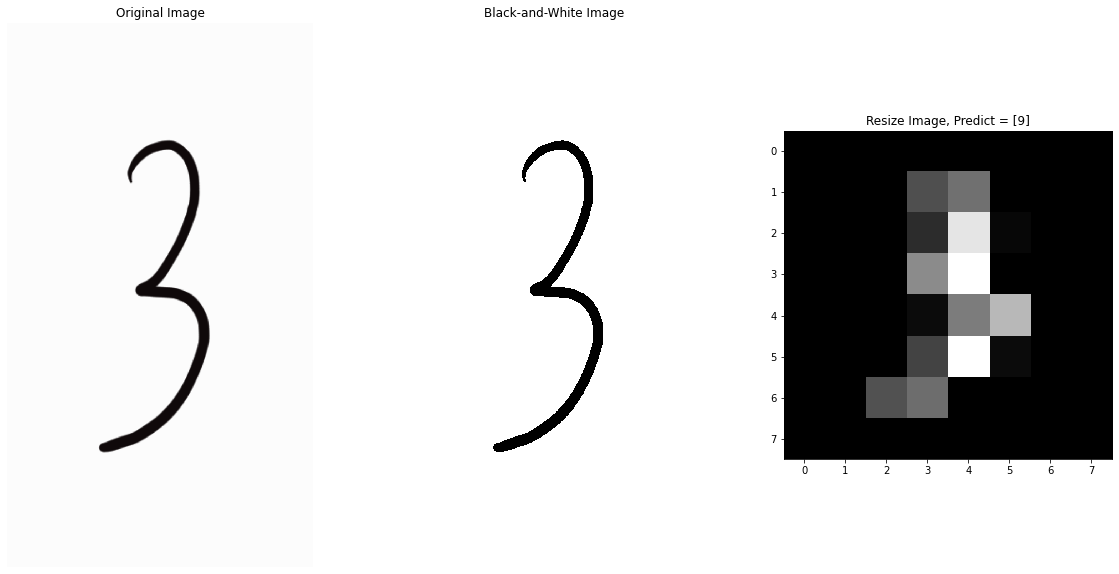

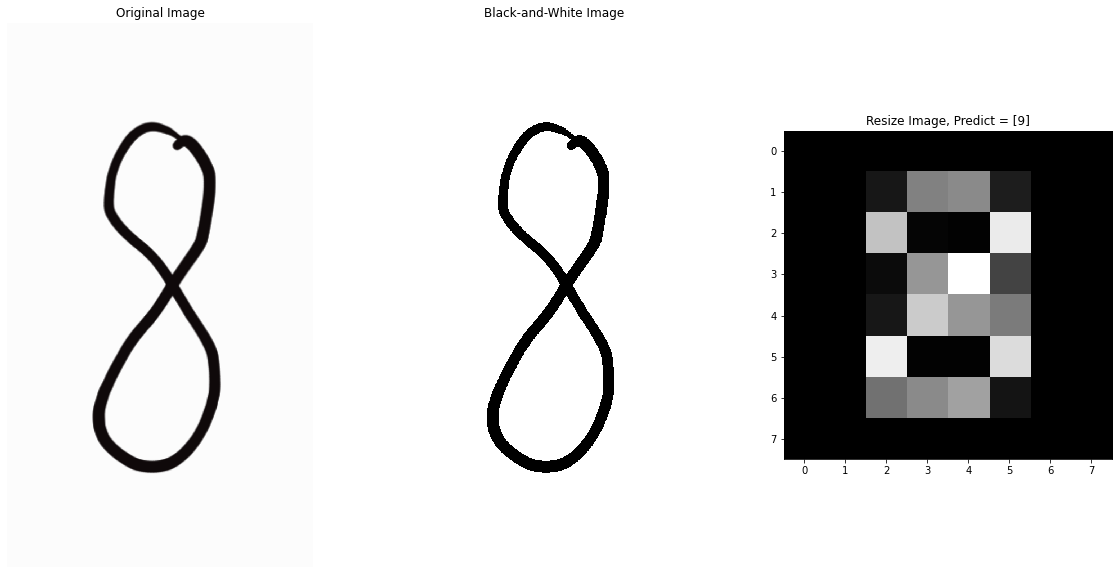

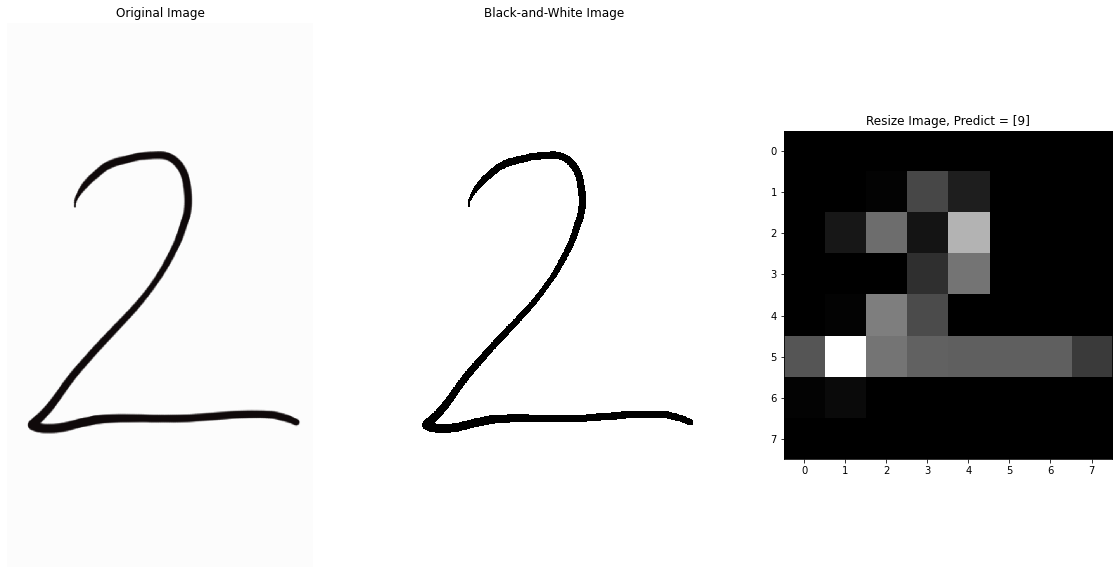

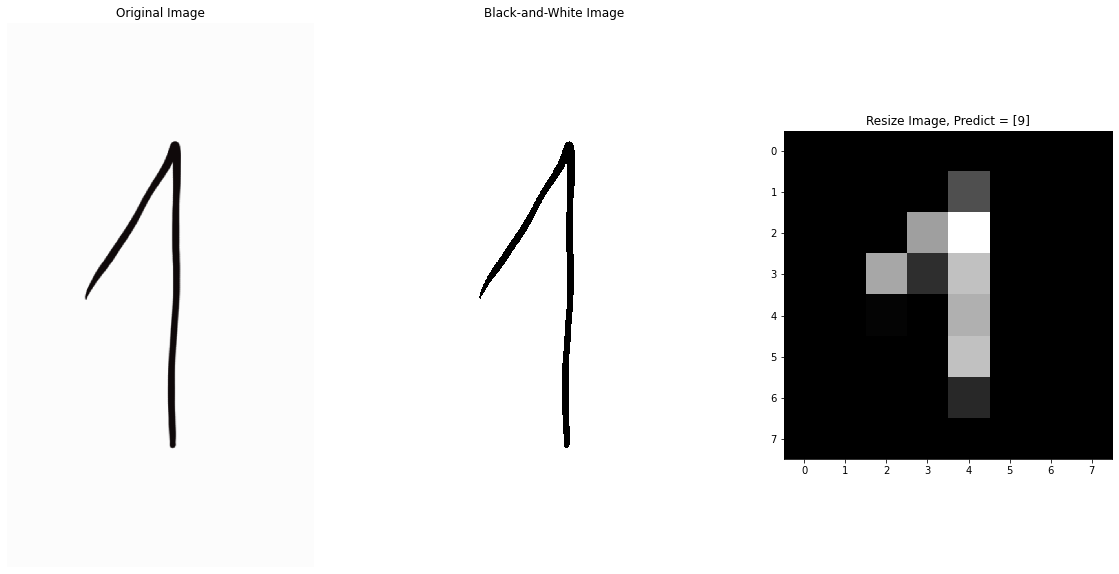

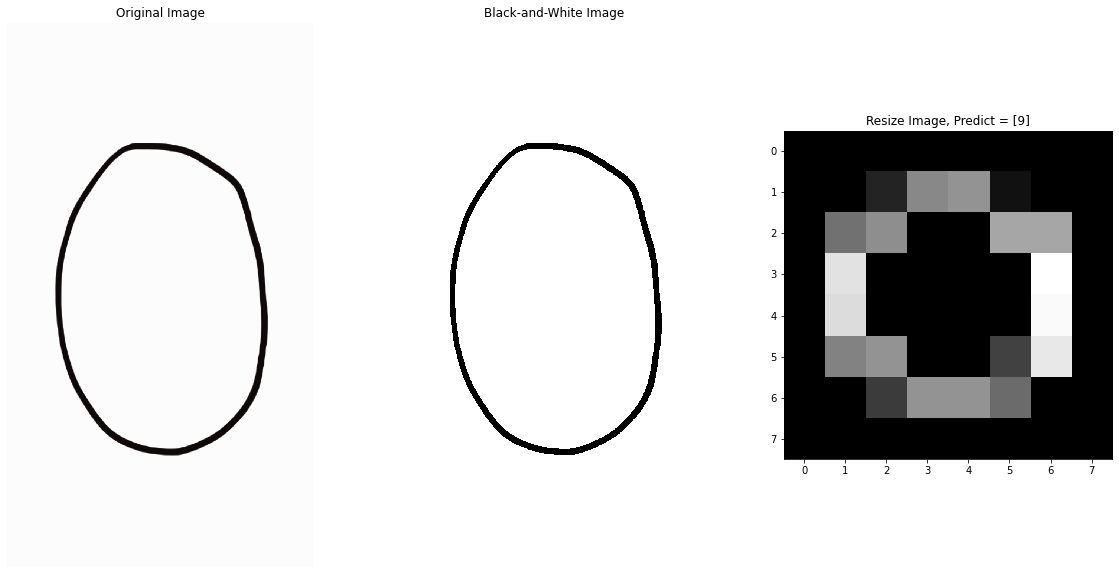

In [ ]:
import os
from google.colab.patches import cv2_imshow

link_drive = '/content/drive/MyDrive/Test/'
all_datas = os.listdir(link_drive)
# Số lượng ảnh từ drive
n_images = len(all_datas)
for i in range(n_images):
  image = cv2.imread(link_drive + all_datas[i])
  _, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
  ax = axes[0]
  ax.set_axis_off()
  #image = cv2.resize(image,(250,350), interpolation = cv2.INTER_AREA)
  ax.imshow(image, interpolation='nearest')
  ax.set_title(f'Original Image')
  ax = axes[1]
  ax.set_axis_off()
  # Đọc ảnh thang độ xám
  image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image_blur = cv2.GaussianBlur(image_gray,(5,5),0)

  #Chuyển đổi hình ảnh thang độ xám thành nhị phân
  im,thre = cv2.threshold(image_blur,115,255,cv2.THRESH_BINARY_INV)

  #Show ảnh đã xử lý
  ax.imshow(thre,cmap='gray', interpolation='nearest')
  ret,thresh2 = cv2.threshold(thre,127,255,cv2.THRESH_BINARY_INV)
  ax.imshow(thresh2,cmap='gray', interpolation='nearest')
  ax.set_title(f'Black-and-White Image')

  #Resize ảnh
  ax = axes[2]

  a = cv2.resize(thre,(8,8),interpolation = cv2.INTER_AREA)
  a = a/255 * 13
  plt.imshow(a, cmap = 'gray', interpolation='nearest')
  a = a.reshape(1, 64)
  
  #Predict Image
  predict = clf.predict(a)
  ax.set_title(f'Resize Image, Predict = {predict}')